# Tratamiento inicial de datos del segundo dataset
Después del tratamiento inicial de datos, generaré un nuevo dataset para no tener que repetir este proceso de nuevo.

In [32]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [33]:
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_json(path, encoding="ISO-8859-1")

# Análisis exploratorio

In [34]:
df = load_data('data', 'dataset_2.json')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5879,5880,5881,5882,5883,5884,5885,5886,5887,5888
tweet,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM","“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM","This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we’ve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwlQAgl","We can never truly repay the debt we owe our fallen heroes. But we can remember them, honor their sacrifice, and affirm in our own lives those enduring ideals of justice, equality, and opportunity for which generations of Americans have given that last full measure of devotion. https://t.co/pRxwmaMClL",This Center is for the leaders of tomorrow who are ready to step up and build the world as it should be. Michelle and I are grateful to Chicagoans and the Chicago City Council for making it happen. https://t.co/86uiJ55azV,"Happy Mother’s Day to every mom out there, especially the remarkable moms in my life, @MichelleObama and my mother-in-law, Marian Robinson. https://t.co/n65fyWg7O8",There are few issues more important to the security of the US than the potential spread of nuclear weapons or the potential for even more destructive war in the Middle East. Today’s decision to put the JCPOA at risk is a serious mistake. My full statement: https://t.co/4oTdXESbxe,"These talented young people will create a better future not just in Africa, but around the world. I can’t wait to spend some time with @ObamaFoundation Leaders and look forward to honoring the Mandela legacy in Johannesburg this summer. https://t.co/b73wGIW4Gj",Our statement on the passing of Former First Lady Barbara Bush: https://t.co/MhTVYCL9Nj,Incredible to have a Chicago team in the Final Four. I’ll take that over an intact bracket any day! Congratulations to everybody @LoyolaChicago - let’s keep it going!,...,Just heard Fake News CNN is doing polls again despite the fact that their election polls were a WAY OFF disaster. Much higher ratings at Fox,"The real story that Congress, the FBI and all others should be looking into is the leaking of Classified information. Must find leaker now!",The Democrats made up and pushed the Russian story as an excuse for running a terrible campaign. Big advantage in Electoral College &amp; lost!,James Clapper and others stated that there is no evidence Potus colluded with Russia. This story is FAKE NEWS and everyone knows it!,#ICYMI: Weekly Address \n➡️https://t.co/ckVx2zgA1x https://t.co/dTGZLvlsGv,"...vast sums of money to NATO &amp; the United States must be paid more for the powerful, and very expensive, defense it provides to Germany!","Despite what you have heard from the FAKE NEWS, I had a GREAT meeting with German Chancellor Angela Merkel. Nevertheless, Germany owes.....",Great meeting with the @RepublicanStudy Committee this morning at the @WhiteHouse! https://t.co/8Y2UoHoYaY,"""The President Changed. So Has Small Businesses' Confidence""\nhttps://t.co/daTGjPmYeJ","North Korea is behaving very badly. They have been ""playing"" the United States for years. China has done little to help!"
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP,TRUMP


Trasponemos para conseguir un dataframe tipo "clave" "valor", renombramos y reordenamos las columnas

In [35]:
df = df.T
df.columns = ['tweet','president']
df = df[['president','tweet']]
df.head()

,president,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
2,OBAMA,"This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we’ve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwlQAgl"
3,OBAMA,"We can never truly repay the debt we owe our fallen heroes. But we can remember them, honor their sacrifice, and affirm in our own lives those enduring ideals of justice, equality, and opportunity for which generations of Americans have given that last full measure of devotion. https://t.co/pRxwmaMClL"
4,OBAMA,This Center is for the leaders of tomorrow who are ready to step up and build the world as it should be. Michelle and I are grateful to Chicagoans and the Chicago City Council for making it happen. https://t.co/86uiJ55azV


In [36]:
df.shape

(5889, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5889 entries, 0 to 5888
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   president  5889 non-null   object
 1   tweet      5889 non-null   object
dtypes: object(2)
memory usage: 298.0+ KB


In [38]:
df.describe()

,president,tweet
count,5889,5889
unique,2,5723
top,TRUMP,Spoke to U.K. Prime Minister Theresa May today to offer condolences on the terrorist attack in London. She is strong and doing very well.
freq,2995,111


# Analizar distribución de los tweets de cada presidente

In [39]:
print('President:')
print(df['president'].value_counts())

President:
TRUMP    2995
OBAMA    2894
Name: president, dtype: int64


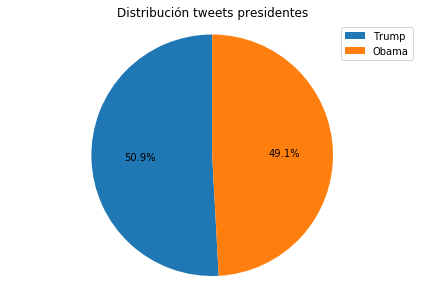

In [40]:
labels = 'Trump', 'Obama'
sizes = df['president'].value_counts()

fig1, ax1 = plt.subplots()

patches, texts, junk = ax1.pie(sizes, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.legend(patches, labels, loc="best")
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribución tweets presidentes', fontsize=12)
plt.show()

# Tratamiento de los datos
Se hará el mismo tratamiento de datos que en el [dataset 1](00_1_AnalisisDataset1.ipynb)

- Borrar Urls, menciones, hastags, emojis etc
- Eliminar **stopwords** usando NLTK
- Reemplazo de **Slangs** y abreviaciones
- Remplazo de **contracciones**
- **Lematización** para llevar las palabras a su forma base considerando en análisis morfológico. Se usará Nltk
- NO usaré **Stemming** para llevar las palabras a su forma base ya que la lemmatización es más avanzada.

In [41]:
df_pandas = df

#change tweets into lowercase
df_pandas['tweet'] = df_pandas['tweet'].str.lower()

#Removing RT retweet term
df_pandas['tweet'] = df_pandas['tweet'].str.replace('rt', '')

#Removing usernames
df_pandas['tweet'] = df_pandas['tweet'].replace(r'@\w+', '', regex=True)

#Removing url links
df_pandas['tweet'] = df_pandas['tweet'].replace(r'http\S+', '', regex=True)
df_pandas['tweet'] = df_pandas['tweet'].replace(r'www.[^ ]+', '', regex=True)

#remove next line \n
df_pandas['tweet'] = df_pandas['tweet'].replace('\n',' ', regex=True)

#remove numbers
df_pandas['tweet'] = df_pandas['tweet'].replace(r'[0-9]+', '', regex=True)

#removing special characters
df_pandas['tweet'] = df_pandas['tweet'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)

# Removing tweet topic
df_pandas['tweet'] = df_pandas['tweet'].str.replace('haze', '')

print(df_pandas)

president  \
0        OBAMA   
1        OBAMA   
2        OBAMA   
3        OBAMA   
4        OBAMA   
...        ...   
5884     TRUMP   
5885     TRUMP   
5886     TRUMP   
5887     TRUMP   
5888     TRUMP   

                                                                                                                                                                                                                                                                                tweet  
0                                   “low plastic stool cheap but delicious noodles cold hanoi beer” this is how i’ll remember tony he taught us about food — but more impoantly about its ability to bring us together to make us a little less afraid of the unknown we’ll miss him   
1                                   “low plastic stool cheap but delicious noodles cold hanoi beer” this is how i’ll remember tony he taught us about food — but more impoantly about its ability to bring us together to make us a 

## Emojis y otros caracteres ASCII

In [42]:
import re

def deEmojify(inputString):  
    return inputString.encode('ascii', 'ignore').decode('ascii')

df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: deEmojify(x))
df_pandas.head()

,president,tweet
0,OBAMA,low plastic stool cheap but delicious noodles cold hanoi beer this is how ill remember tony he taught us about food but more impoantly about its ability to bring us together to make us a little less afraid of the unknown well miss him
1,OBAMA,low plastic stool cheap but delicious noodles cold hanoi beer this is how ill remember tony he taught us about food but more impoantly about its ability to bring us together to make us a little less afraid of the unknown well miss him
2,OBAMA,this national gun violence awareness day show your commitment to keeping our kids safe from gun violence then for everyone weve lost take action to change our leadership and our laws until they reflect that commitment no matter how long it takes
3,OBAMA,we can never truly repay the debt we owe our fallen heroes but we can remember them honor their sacrifice and affirm in our own lives those enduring ideals of justice equality and oppounity for which generations of americans have given that last full measure of devotion
4,OBAMA,this center is for the leaders of tomorrow who are ready to step up and build the world as it should be michelle and i are grateful to chicagoans and the chicago city council for making it happen


## Stopwords

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import (stopwords)

stop_words_eng = stopwords.words('english')

df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_eng)]))

print(df_pandas)

president  \
0        OBAMA   
1        OBAMA   
2        OBAMA   
3        OBAMA   
4        OBAMA   
...        ...   
5884     TRUMP   
5885     TRUMP   
5886     TRUMP   
5887     TRUMP   
5888     TRUMP   

                                                                                                                                                                                 tweet  
0          low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss  
1          low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss  
2        national gun violence awareness day show commitment keeping kids safe gun violence everyone weve lost take action change leadership laws reflect commitment matter long takes  
3     never truly repay debt owe fallen heroes r

## Slangs

In [45]:
""" Creates a dictionary with slangs and their equivalents and replaces them """
from functools import partial

with open('slang.txt') as file:
    slang_map = dict(map(str.strip, line.partition('\t')[::2])
    for line in file if line.strip())

slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

In [46]:
df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: replaceSlang(x))
df_pandas[:100]

,president,tweet
0,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss
1,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss
2,OBAMA,national gun violence awareness day show commitment keeping kids safe gun violence everyone weve lost take action change leadership laws reflect commitment matter long takes
3,OBAMA,never truly repay debt owe fallen heroes remember honor sacrifice affirm lives enduring ideals justice equality oppounity generations americans given last full measure devotion
4,OBAMA,center leaders tomorrow ready step build world michelle grateful chicagoans chicago city council making happen
...,...,...
95,OBAMA,lions tiggers bears oh happyhalloween
96,OBAMA,usted su familia merecen la tranquilidad de saber que estn cubieos el mercado de seguros abre maana
97,OBAMA,speak suppo quality affordable health care
98,OBAMA,there's nothing scared searching health insurance three four people getcovered less month


## Contracciones

In [47]:
contractions = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", 
    "can't've": "cannot have", "'cause": "because", "could've": "could have", 
    "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
    "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
    "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
    "I'll've": "I will have","I'm": "I am", "I've": "I have", 
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
    "i'll've": "i will have","i'm": "i am", "i've": "i have", 
    "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
    "it'll": "it will", "it'll've": "it will have","it's": "it is", 
    "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
    "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
    "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
    "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
    "this's": "this is",
    "that'd": "that would", "that'd've": "that would have","that's": "that is", 
    "there'd": "there would", "there'd've": "there would have","there's": "there is", 
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
    "they'll've": "they will have", "they're": "they are", "they've": "they have", 
    "to've": "to have", "wasn't": "was not", "we'd": "we would", 
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
    "we're": "we are", "we've": "we have", "weren't": "were not", 
    "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
    "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", 
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
    "who's": "who is", "who've": "who have", "why's": "why is", 
    "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
    "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def replaceContractions(inputString):
    for word in inputString.split():
        if word.lower() in contractions:
            inputString = inputString.replace(word, contractions[word.lower()])

    return(inputString)

In [49]:
df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: replaceContractions(x))
df_pandas[:100]

,president,tweet
0,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss
1,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony taught us food impoantly ability bring us together make us little less afraid unknown well miss
2,OBAMA,national gun violence awareness day show commitment keeping kids safe gun violence everyone weve lost take action change leadership laws reflect commitment matter long takes
3,OBAMA,never truly repay debt owe fallen heroes remember honor sacrifice affirm lives enduring ideals justice equality oppounity generations americans given last full measure devotion
4,OBAMA,center leaders tomorrow ready step build world michelle grateful chicagoans chicago city council making happen
...,...,...
95,OBAMA,lions tiggers bears oh happyhalloween
96,OBAMA,usted su familia merecen la tranquilidad de saber que estn cubieos el mercado de seguros abre maana
97,OBAMA,speak suppo quality affordable health care
98,OBAMA,there is nothing scared searching health insurance three four people getcovered less month


## Borrar nans generados y palabras que solo se repiten una vez

In [50]:
# Delete no repeated words and empty tweets
words_one = pd.Series(' '.join(df_pandas['tweet']).split()).value_counts().where(lambda x : x==1).dropna().index
df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in words_one))
df_pandas = df_pandas.loc[df_pandas['tweet']!='']

## Lemmatization
Se opta por la lematización en lugar del Stemming porque es más completa que el Stemmin, ya que este solo se basa en acortar palabras cortando el inicio o el fin de la cadena y la lematización lo hace considerando el análisis morfológico.

In [51]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatizeWord(inputString):
    lemmatizer = WordNetLemmatizer()
    
    for word in inputString.split():
        # Parámetro v para obtener verbos en lugar de sustantivos
        inputString = inputString.replace(word, lemmatizer.lemmatize(word,'v'))

    return inputString

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asens\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
df_pandas['tweet'] = df_pandas['tweet'].apply(lambda x: lemmatizeWord(x))

In [53]:
df_pandas.shape

(5879, 2)

Hemos perdido 10 filas, inicialmente había 5889

# Guardamos dataset actual
Guardamos el actual dataframe en un nuevo archivo para no tener que repetir el proceso de limpieza.

In [54]:
df_pandas.to_csv('./data/dataset_2_limpieza_inicial.csv', sep=',', decimal='.', index=False)